In [14]:
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', None)

plt.rcParams["figure.figsize"] = [10,5]
import warnings
warnings.filterwarnings("ignore")

In [15]:
from shapely.geometry import Point,Polygon
import geopandas as gpd
import descartes

#### Here we try to load the map

In [16]:
kings_county = gpd.read_file('/Users/paultorres/Downloads/kings_county/School_Districts_in_King_County___schdst_area-shp/School_Districts_in_King_County___schdst_area.shp')

In [17]:
kings_county

,OBJECTID,SCHDST,NAME,DSTNUM,Shape_Leng,Shape_Area,geometry
0,1,1,Seattle,17001,435348.243737,2.570049e+09,"MULTIPOLYGON (((-122.40324 47.66637, -122.4028..."
1,2,210,Federal Way,17210,174555.620013,1.002917e+09,"POLYGON ((-122.29057 47.39374, -122.29039 47.3..."
2,3,216,Enumclaw,17216,735641.958121,1.264371e+10,"POLYGON ((-121.84898 47.34708, -121.84908 47.3..."
3,4,400,Mercer Island,17400,76961.896481,1.757027e+08,"POLYGON ((-122.24475 47.59601, -122.24461 47.5..."
4,5,401,Highline,17401,162866.561541,8.690626e+08,"POLYGON ((-122.35853 47.51553, -122.35851 47.5..."
5,6,402,Vashon Island,17402,273923.139400,1.018205e+09,"POLYGON ((-122.47330 47.51112, -122.47302 47.5..."
6,7,403,Renton,17403,206065.171370,9.013959e+08,"POLYGON ((-122.19290 47.54932, -122.19281 47.5..."
7,8,404,Skykomish,17404,462386.816586,1.062463e+10,"POLYGON ((-121.43171 47.78048, -121.41064 47.7..."
8,9,405,Bellevue,17405,197777.252504,9.332731e+08,"POLYGON ((-122.21511 47.65306, -122.21511 47.6..."
9,10,406,Tukwila,17406,79789.132651,1.561630e+08,"POLYGON ((-122.27170 47.49817, -122.27149 47.4..."


Text(0.5, 227.74683479806424, 'Longitude')

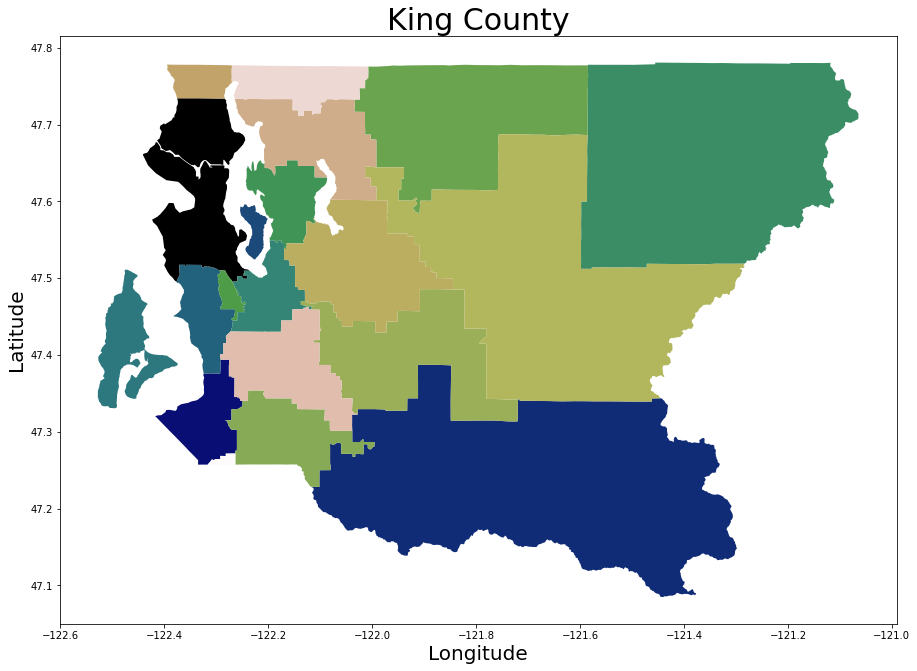

In [20]:
fig, ax = plt.subplots(figsize = (15,15))
kings_county.plot(ax=ax, cmap = 'gist_earth')
ax.set_title('King County',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})
#plt.savefig('kings_county_blankmap.png')
#plt.savefig("kings_county_blankmap.png", bbox_inches = 'tight',pad_inches = 0)

In [21]:
df = pd.read_csv('kc_house_data_train.csv')
#crs = {'init': 'epsg:4326'}
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [ ]:
df_id = df[['id','price','']]

In [25]:
crs = {'init': 'epsg:4326'}
geometry = [Point(x,y) for x,y in zip(df.long,df.lat)]
type(geometry[0])

shapely.geometry.point.Point

In [27]:
geo_df = gpd.GeoDataFrame(df, # specifify your dataframe
                          crs = crs, # this is your coordinate system
                          geometry = geometry) # specify the geometry list we created

geo_df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,POINT (-122.16200 47.43880)
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,POINT (-122.28500 47.67840)
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,POINT (-122.12900 47.56460)
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,POINT (-122.22800 47.69950)
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,POINT (-122.08300 47.66470)


In [143]:
geo_df_id = geo_df[['id','price','geometry']]
geo_df_id.head()

,id,price,geometry
0,2591820310,365000.0,POINT (-122.16200 47.43880)
1,7974200820,865000.0,POINT (-122.28500 47.67840)
2,7701450110,1038000.0,POINT (-122.12900 47.56460)
3,9522300010,1490000.0,POINT (-122.22800 47.69950)
4,9510861140,711000.0,POINT (-122.08300 47.66470)


plt.figure(figsize = (15,15))
ax = kings_county.plot(color = 'grey')
#fig, ax = plt.subplots(figsize = (15,15))
#kings_county.plot(ax=ax, alpha = 0.8, color = 'grey')
#ax.plot(geo_df[geo_df['price'] >= 750000])

geo_df.plot(ax=ax)
#geo_df[geo_df['price'] >= 750000].plot(ax = ax , markersize = .1, color = 'blue',marker = 'o',label = 'pricey')
#geo_df[geo_df['price'] < 750000].plot(ax = ax , markersize = .1, color = 'red',marker = '-',label = 'cheap')
#plt.legend(prop = {'size':15} )

plt.show()


In [18]:
geo_df[geo_df['price'] >= 750000]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,POINT (47.678 -122.285)
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,POINT (47.565 -122.129)
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,POINT (47.700 -122.228)
6,6,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,...,2690,0,1987,0,98007,47.6596,-122.144,2420,8087,POINT (47.660 -122.144)
15,15,3303980660,20140603T000000,1070000.0,4,3.75,4130,12320,2.0,0,...,4130,0,2001,0,98059,47.5194,-122.151,3690,11227,POINT (47.519 -122.151)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17276,17276,1777600850,20140624T000000,859000.0,4,2.25,3550,13900,1.0,0,...,1830,1720,2010,0,98006,47.5681,-122.127,2770,12200,POINT (47.568 -122.127)
17279,17279,1925059254,20150507T000000,2998000.0,5,4.00,6670,16481,2.0,0,...,4960,1710,2007,0,98004,47.6409,-122.221,4800,16607,POINT (47.641 -122.221)
17281,17281,1251200045,20140620T000000,1462500.0,5,3.25,3840,4800,3.0,0,...,2750,1090,2008,0,98144,47.5929,-122.290,2060,4800,POINT (47.593 -122.290)
17282,17282,7625704510,20141022T000000,850000.0,4,3.25,3450,6500,2.0,0,...,2450,1000,1994,0,98136,47.5437,-122.388,1750,6500,POINT (47.544 -122.388)


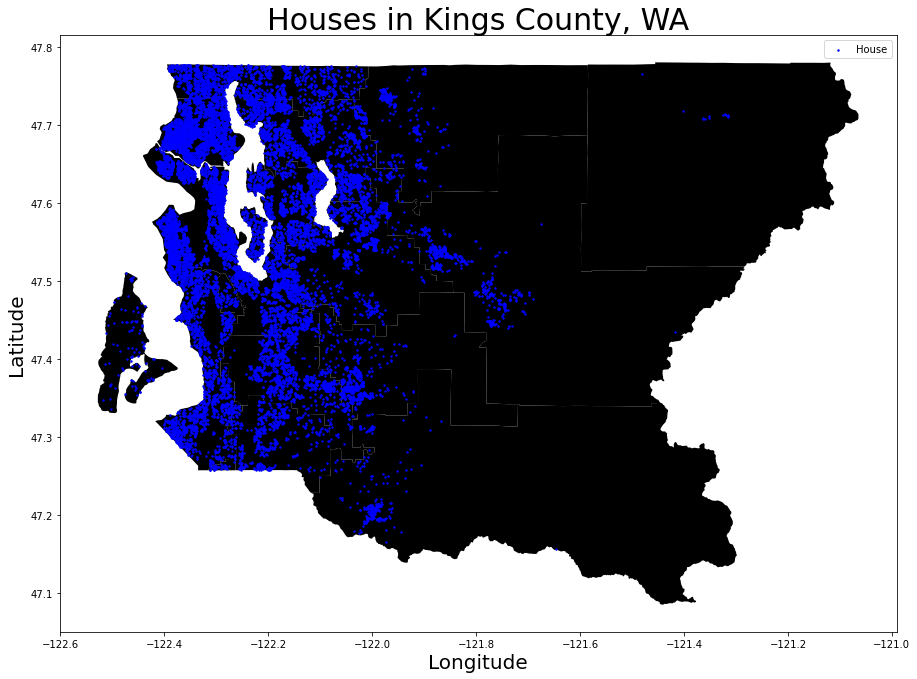

In [146]:
fig, ax = plt.subplots(figsize = (15,25))
kings_county.plot(ax=ax, color = 'black')
geo_df.plot(ax = ax , markersize = 2, color = 'blue',marker = 'o',label = 'House', aspect = 1.5)
plt.legend(prop = {'size':10} )
ax.set_title('Houses in Kings County, WA', fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})
#plt.savefig("kings_county_houses.png", bbox_inches = 'tight',pad_inches = 0)
plt.show()

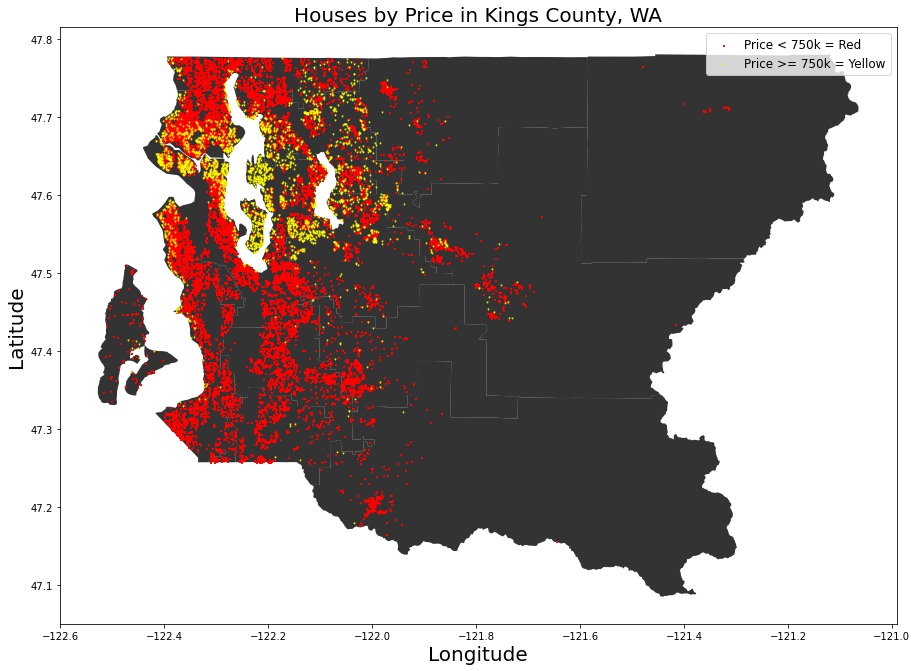

In [76]:
fig, ax = plt.subplots(figsize = (15,25))
kings_county.plot(ax=ax, alpha = 0.8, color = 'black')
geo_df[geo_df['price'] < 750000].plot(ax = ax , markersize = 1, color = 'red',marker = 's',label = 'Price < 750k = Red', aspect = 1.5)
geo_df[geo_df['price'] >= 750000].plot(ax = ax , markersize = 1, color = 'yellow',marker = 'v',label = 'Price >= 750k = Yellow', aspect = 1.5)
plt.legend(prop = {'size':12} )
ax.set_title('Houses by Price in Kings County, WA', fontdict = {'fontsize': 20})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})
#plt.savefig('kings_county_both.png', bbox_inches = 'tight',pad_inches = 0)
plt.show()



In [79]:
kings_county['coords'] = kings_county['geometry'].apply(lambda x: x.representative_point().coords[:])
kings_county['coords'] = [coords[0] for coords in kings_county['coords']]

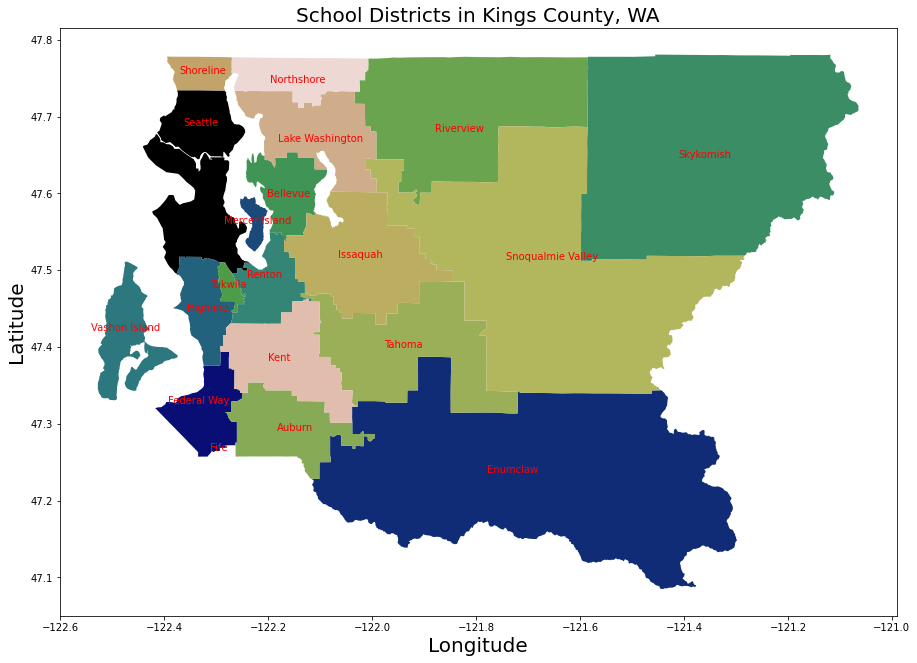

In [144]:
left = ['Riverview','Snoqualmie Valley']
center = ['Skykomish','Kent','Auburn','Tahoma','Vashon Island','Northshore','Shoreline','Renton','Highline',
         'Issaquah','Enumclaw','Seattle','Federal Way','Bellevue','Mercer Island','Lake Washington','Tukwila']
right = ['Fife']

kings_county.plot(figsize = (15,15),cmap = 'gist_earth')

for idx, row in kings_county.iterrows():
    if row['NAME'] in left:
        plt.annotate(s=row['NAME'], xy=row['coords'],
                 ha='left', color = 'red')
    elif row['NAME'] in center:
        plt.annotate(s=row['NAME'], xy=row['coords'],
                 ha='center', color = 'red')
    elif row['NAME'] in right:
        plt.annotate(s=row['NAME'], xy=row['coords'],
                 ha='right', color = 'red')
plt.title('School Districts in Kings County, WA', fontdict = {'fontsize': 20})
plt.ylabel('Latitude',fontdict = {'fontsize': 20})
plt.xlabel('Longitude',fontdict = {'fontsize': 20})
#plt.savefig('kings_county_districts.png', bbox_inches = 'tight',pad_inches = 0)
